### Project Name: Flight Prediction Analysis

### Project Objective:
- The number of people who fly has dramatically increased in recent years. Pricing alters dynamically owing to many variables, making it difficult for airlines to maintain prices. In this project, I am trying to solve this problem by cleaning, preparing and analysing the flight price dataset.
- Hence, the goal of this project is to clean, prepare and analyse the flight price dataset taken from Kaggle.
- Basically dataset have price based on information such as airline, date_of_journey, flight route information including number of stops and duration of flight.
- So that we can use this dataset to analyse the flight journey price based on a variety of variables as mentioned above. 



Using flight price dataset we try to find out following questions answer:
1. Top 10 Aviation Companies whose flight tickets are sold the most ?
2. Which month have most number of flights?
3. Which airline is most expensive?
4. Which airline has boarded the most?
5. Which source will be having highest fare?
6. Which destination will be having highest fare?

### Analysis Involve Phases:
1. Data collection
2. Data Understanding
3. Data Cleaning and handling null values
4. Data Analyse

In [98]:
# importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Phase 1: Data Collection/Reading

In [2]:
final_df = pd.read_csv("flight_prediction.csv")

### Phase 2: Data Understanding

In [3]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
final_df = final_df.rename(columns={'Airline':'airline', 
                         'Date_of_Journey': 'date_of_journey', 
                         'Source': 'source', 
                         'Destination': 'destination', 
                         'Route': 'route',
                         'Dep_Time': 'dep_time', 
                         'Arrival_Time': 'arrival_time', 
                         'Duration':'duration',
                         'Total_Stops': 'total_stops', 
                         'Additional_Info': 'additional_info',
                         'Price': 'price' 
                         })

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13354 non-null  object 
 1   date_of_journey  13354 non-null  object 
 2   source           13354 non-null  object 
 3   destination      13354 non-null  object 
 4   route            13353 non-null  object 
 5   dep_time         13354 non-null  object 
 6   arrival_time     13354 non-null  object 
 7   duration         13354 non-null  object 
 8   total_stops      13353 non-null  object 
 9   additional_info  13354 non-null  object 
 10  price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [6]:
final_df.shape

(13354, 11)

### Observations:
- Number of variables = 11
- Number of rows = 13354
- Number of categorical type of feature = 10
- Number of numerical type of feature = 1

In [7]:
final_df.isnull().sum()

airline               0
date_of_journey       0
source                0
destination           0
route                 1
dep_time              0
arrival_time          0
duration              0
total_stops           1
additional_info       0
price              2671
dtype: int64

### Observation:
  1. airline:
  - Airline name for which the ticket is booked.
  - Total 12 unique airline names in the dataset.
  
  2. date_of_journey:
  - Journey date of each traveller. 
  - It is a date column in MM/DD/YYYY format.
  - Dates are from 01/03/2019 to 09/06/2019
  
  
  3. source:
  - Source from which the airline would depart.
  - Total 5 unique source names in the dataset.
  - It contains Banglore, Kolkata, Delhi, Chennai, Mumbai.
  
  
  4. destination:
  - Destination to which airline would arrive
  - There are total 6 unique destination names in the dataset.
  - It contains New Delhi, Banglore, Cochin, Kolkata, Delhi, Hyderabad.
  
  5. route:
  - Route of the airline from source to destination.
  - There is one null value in the dataset.
  
  
  6. dep_time:
  - Time at which flight would departure from the source.
  - It is in H:MM format.
  
  7. arrival_time:
  - Time at which flight would arrive at the destination.
  - It is in H:MM format followed by date of arrival.
  
  
  8. duration: 
  - Duration that airline takes to fly from source to destination.
  - It is in H:MM format.
  
  9. total_stops:
  - Total no. of stops that airline takes between source and destination.
  - There are total 5 unique total stops in the dataset.
  - There is one null value in the dataset.
  - It contains non-stop, 2 stops, 1 stop, 3 stops, nan, 4 stops.
  
  
   10. additional_info:
  - Represents any Additional info about the airline.
  - There are total 10 unique additional information in the dataset.
  - It contains No info, In-flight meal not included,No check-in baggage included, 1 Short layover, No Info,1 Long layover, Change airports, Business class,Red-eye flight, 2 Long layover.
  
  
   11. price:
  - Represents fare of the ticket to fly from Source to destination in rupees.

In [8]:
final_df["source"].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: source, dtype: int64

In [9]:
final_df["destination"].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: destination, dtype: int64

### Phase 3: Data Cleaning

#### Function Defination

###### Step 1: Dropping 2 rows
- In dataset, there are 2 records whose flight duration is of 5 min which is inconsisent because distance between Mumbai to Hyderabad is approximately 713 Km and it approximately takes 2 hours to reach to Hyderabad from Mumbai.
- So the information seems incorrect that's why dropping those records.

###### Step 2: Filling total_stops column null value
- In dataset there is one row where total_stops column contains 1 null value.
- As the flight duration is approximately 23 hours and journey is from Delhi to Cochin hence here replacing total_stops null value with 1.

###### Step 3: Handling categorical(total_stops) Column
- In dataset replacing total_stops column with integer variable such as non-stop:0,1 stop:1,2 stops:2,3 stops:3,4 stops:4,nan:1

###### Step 4:Delete route column
- Analysis not based on route column hence, deleting route column.

In [10]:
def data_cleaning(dataframe):
    
    # Step 1:Dropping 2 rows
    dataframe.drop(6474,axis=0,inplace=True)
    dataframe.drop(13343,axis=0,inplace=True)
    
    
    # Step 2: Filling total_stops column null value
    dataframe['total_stops'] = dataframe['total_stops'].fillna(1)
    
    # Step 3:Handling categorical(total_stops) Column
    recode = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4, 'nan':1}
    dataframe['total_stops'] =dataframe['total_stops'].replace(recode)
    
    # Step 4:Delete route column
    dataframe.drop('route',axis=1,inplace=True)
    
    print("Function exceuted sucessfully")
    
    return dataframe


### Handling Null Values

###### Step 1: Impute mean for price column:
- price column has total 2671 null records:
    - ticket price is depended on airline, source, destination and number of stops.
- Hence null price values will be imputed or will be replaced by mean value based on airline, route along with number of stops.

###### Step 2: Copying data in test variable:
- Orginal dataframe will remain untouched while performing various operations.

###### Step 3: Filling null values with mean data:
- After calucating mean in Step 1 we are replacing all price columns null values with mean data as price is dependent on various factors like which airline, source and destination and number of stops.

###### Step 4: Copying test data in final dataframe:
- After performing all the operations we should copy all aggregated data to final dataframe.

###### Step 5: After step - 3 drop rows having incomplete information
- After Step 2-found that there is only one record left for Jet Airways Business flying from Bangalore to New Delhi.
     - Because, as there is no corresponding rows for the factors which is airline,source,destination in dataset to compute it's mean price amount.
     - In this case we are deleting the record.If it contains multiple records then we can be able to do futher analysis.
     - In real world:
       - We try to find similiar records i.e. same source ,destination and airline and will try to impute mean for the same.
       - We'll ask airline for more detailed information of the flight and can do the further analysis.
       - We can delete the record.

In [11]:
def handling_null_value(dataframe):
       
    # Step 1:Impute mean for price column.
    factors = ['airline','source','destination','total_stops']
    dataframe.groupby(factors)['price'].mean().to_frame().reset_index()
    
    # Step 2: Copying data in test variable
    test = dataframe.copy()
    
    # Step 3: Filling null values with mean data:
    factors=['airline','source','destination','total_stops']
    test['price'] = test['price'].fillna(test.groupby(factors)['price'].transform('mean'))
    
    # Step 4: Copying test data in final dataframe
    dataframe=test.copy()
    
    
    # Step 5: After step - 3 drop rows having incomplete information:
    dataframe.drop(12502,axis=0,inplace=True)
    
    print("Function Executed sucessfully!!")
    
    return dataframe

#### Code Execution

In [12]:
data_cleaning_df = data_cleaning(dataframe = final_df)

Function exceuted sucessfully


In [13]:
handling_null_value_df = handling_null_value(dataframe = data_cleaning_df)

Function Executed sucessfully!!


In [14]:
handling_null_value_df.price.isnull().sum()

0

In [15]:
final_df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302.0


### Phase 4: Data Analysis

#### Q. 1.Top 10 Aviation Companies whose flight tickets are sold the most ?

In [16]:
analysis_df=handling_null_value_df.copy()

In [17]:
most_sold_ticket=analysis_df["airline"].value_counts()[0:10].reset_index(name="count_tickets").sort_values(by="count_tickets", ascending=False)

In [18]:
most_sold_ticket

,index,count_tickets
0,Jet Airways,4746
1,IndiGo,2564
2,Air India,2190
3,Multiple carriers,1543
4,SpiceJet,1026
5,Vistara,608
6,Air Asia,405
7,GoAir,240
8,Multiple carriers Premium economy,16
9,Jet Airways Business,7


In [19]:
##correct
##sort the graph it will look nice
## tilt the airline name so it will be easy to read

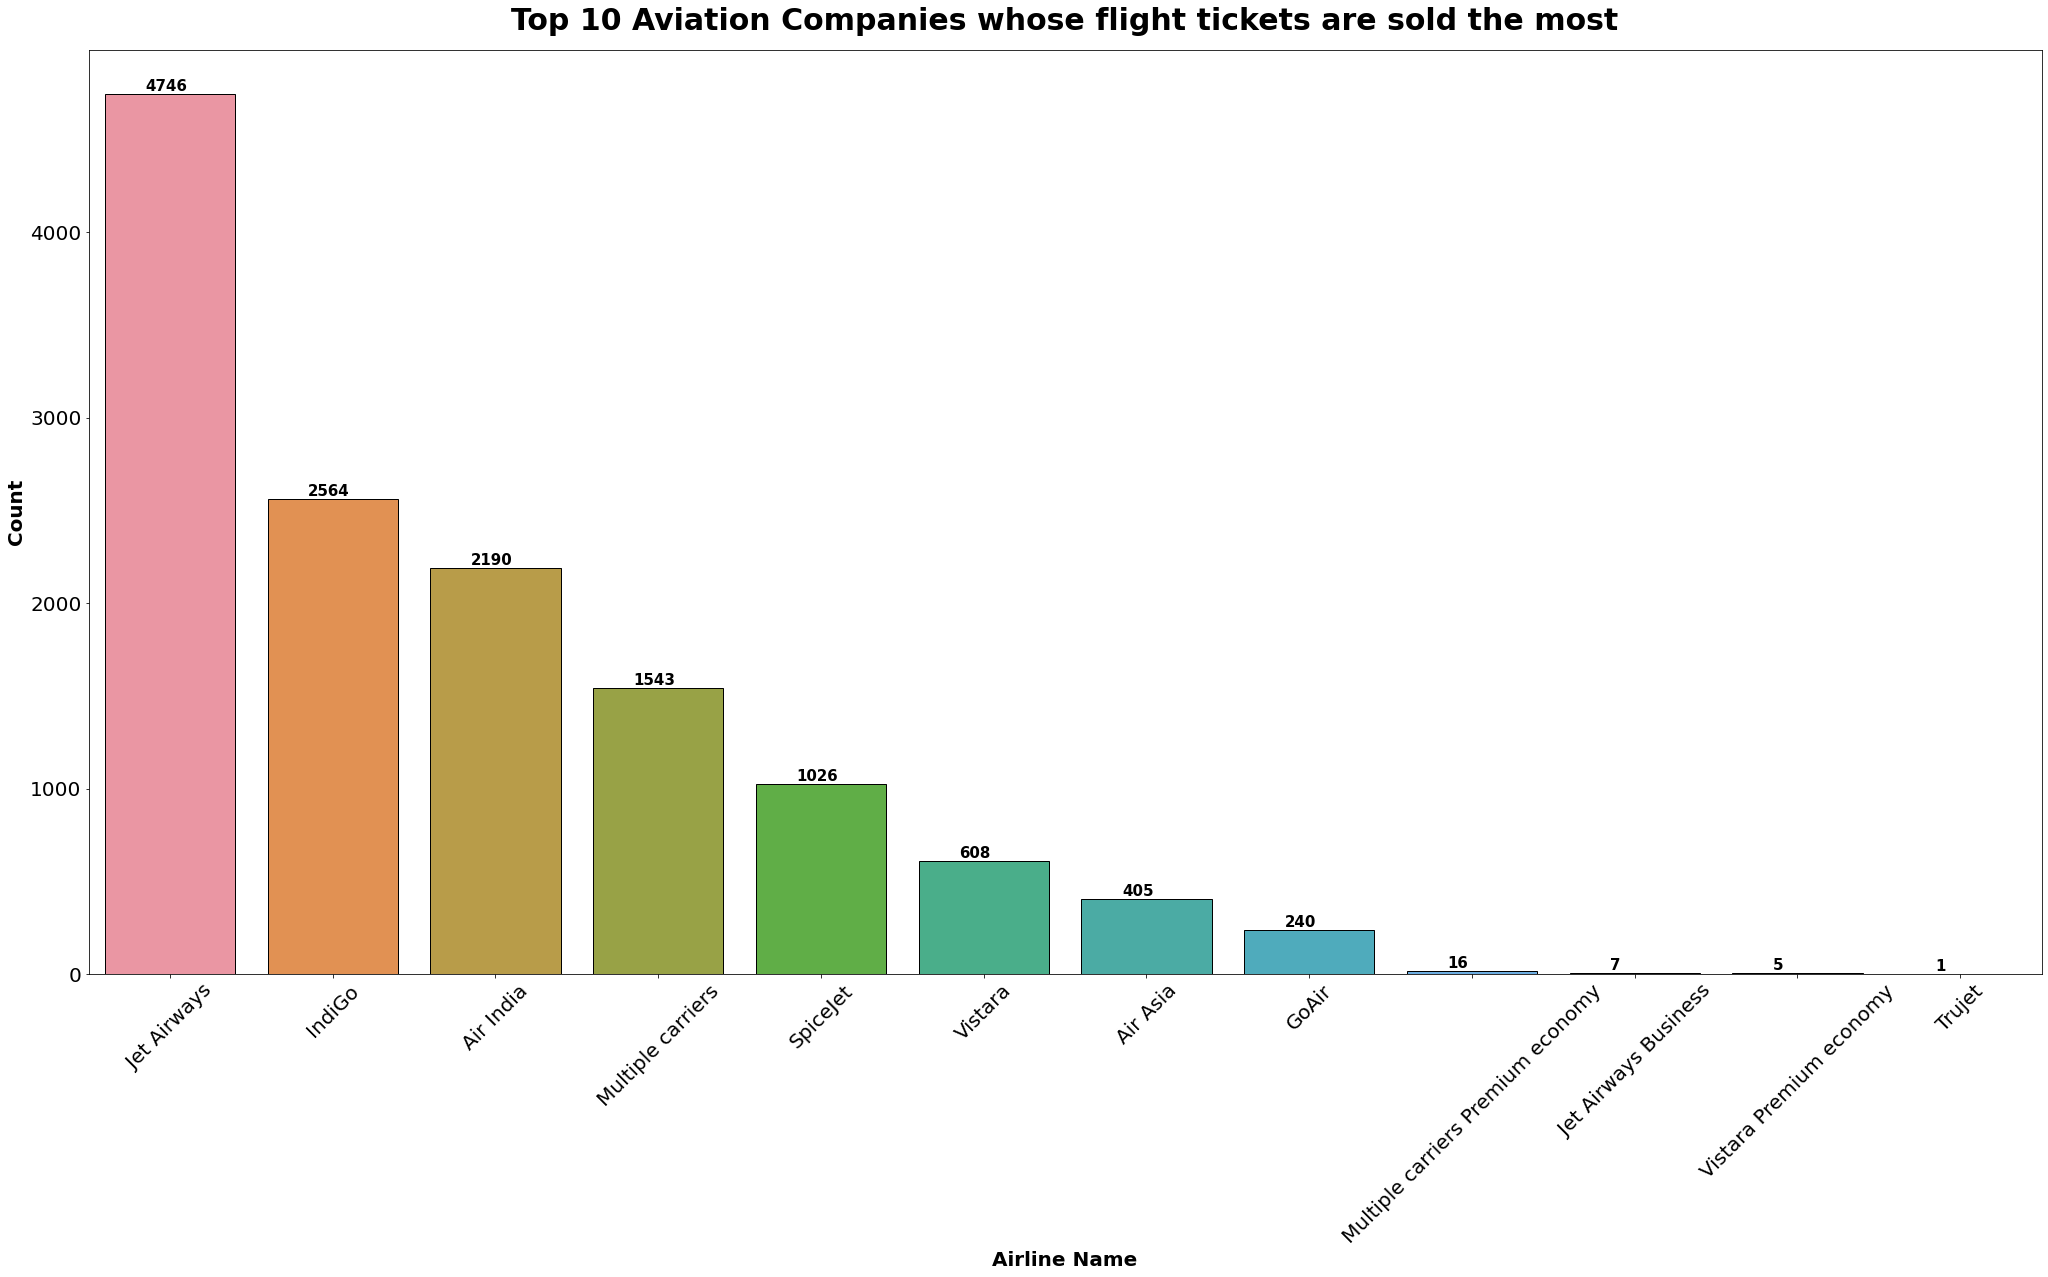

In [114]:
plt.figure(figsize=(35,17))
ax=sns.countplot(x='airline',data=analysis_df,ec="black",order=analysis_df["airline"].value_counts().index)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=20)
plt.xticks(rotation = 45,fontsize=20)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=30,pad=20)
plt.yticks(fontsize=20)

for p, label in zip(ax.patches, analysis_df["airline"].value_counts().values):
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black',weight="bold",fontsize=15)


In [115]:
airline_names = analysis_df.airline.value_counts().index[:8]

In [116]:
airline_val = analysis_df.airline.value_counts().values[:8]

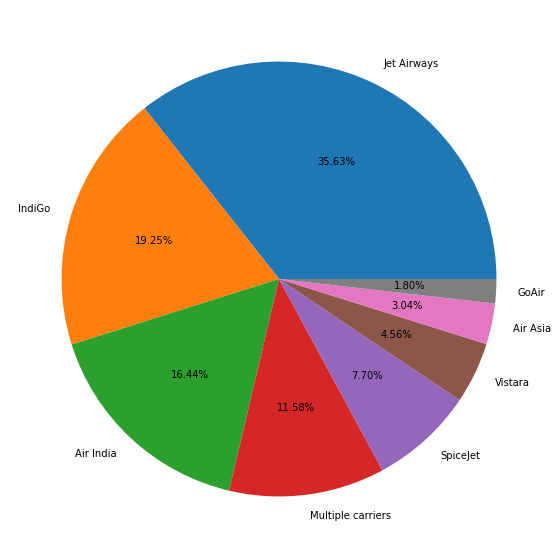

In [117]:
plt.figure(figsize=(20,10))
graph=plt.pie(airline_val,labels=airline_names,autopct='%1.2f%%')

### Observation:
- Of the total flight tickets sold Jet Airways has the highest share which is 35.62% followed by Indigo and Air India.   

#### Q.2. Which month have most number of flights?

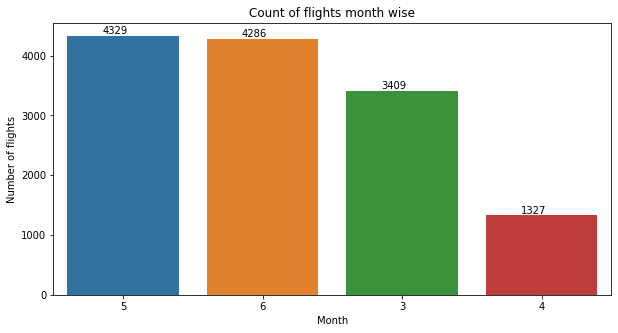

In [118]:
analysis_df["journey_month"]=pd.to_datetime(analysis_df['date_of_journey'], format= "%d/%m/%Y").dt.month
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'journey_month', data = analysis_df,order=final_df["journey_month"].value_counts().index)
plt.xlabel('Month')
plt.ylabel('Number of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Observation:
- May has most number of flights followed by June and March.

#### Q.3. Which airline is most expensive?

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


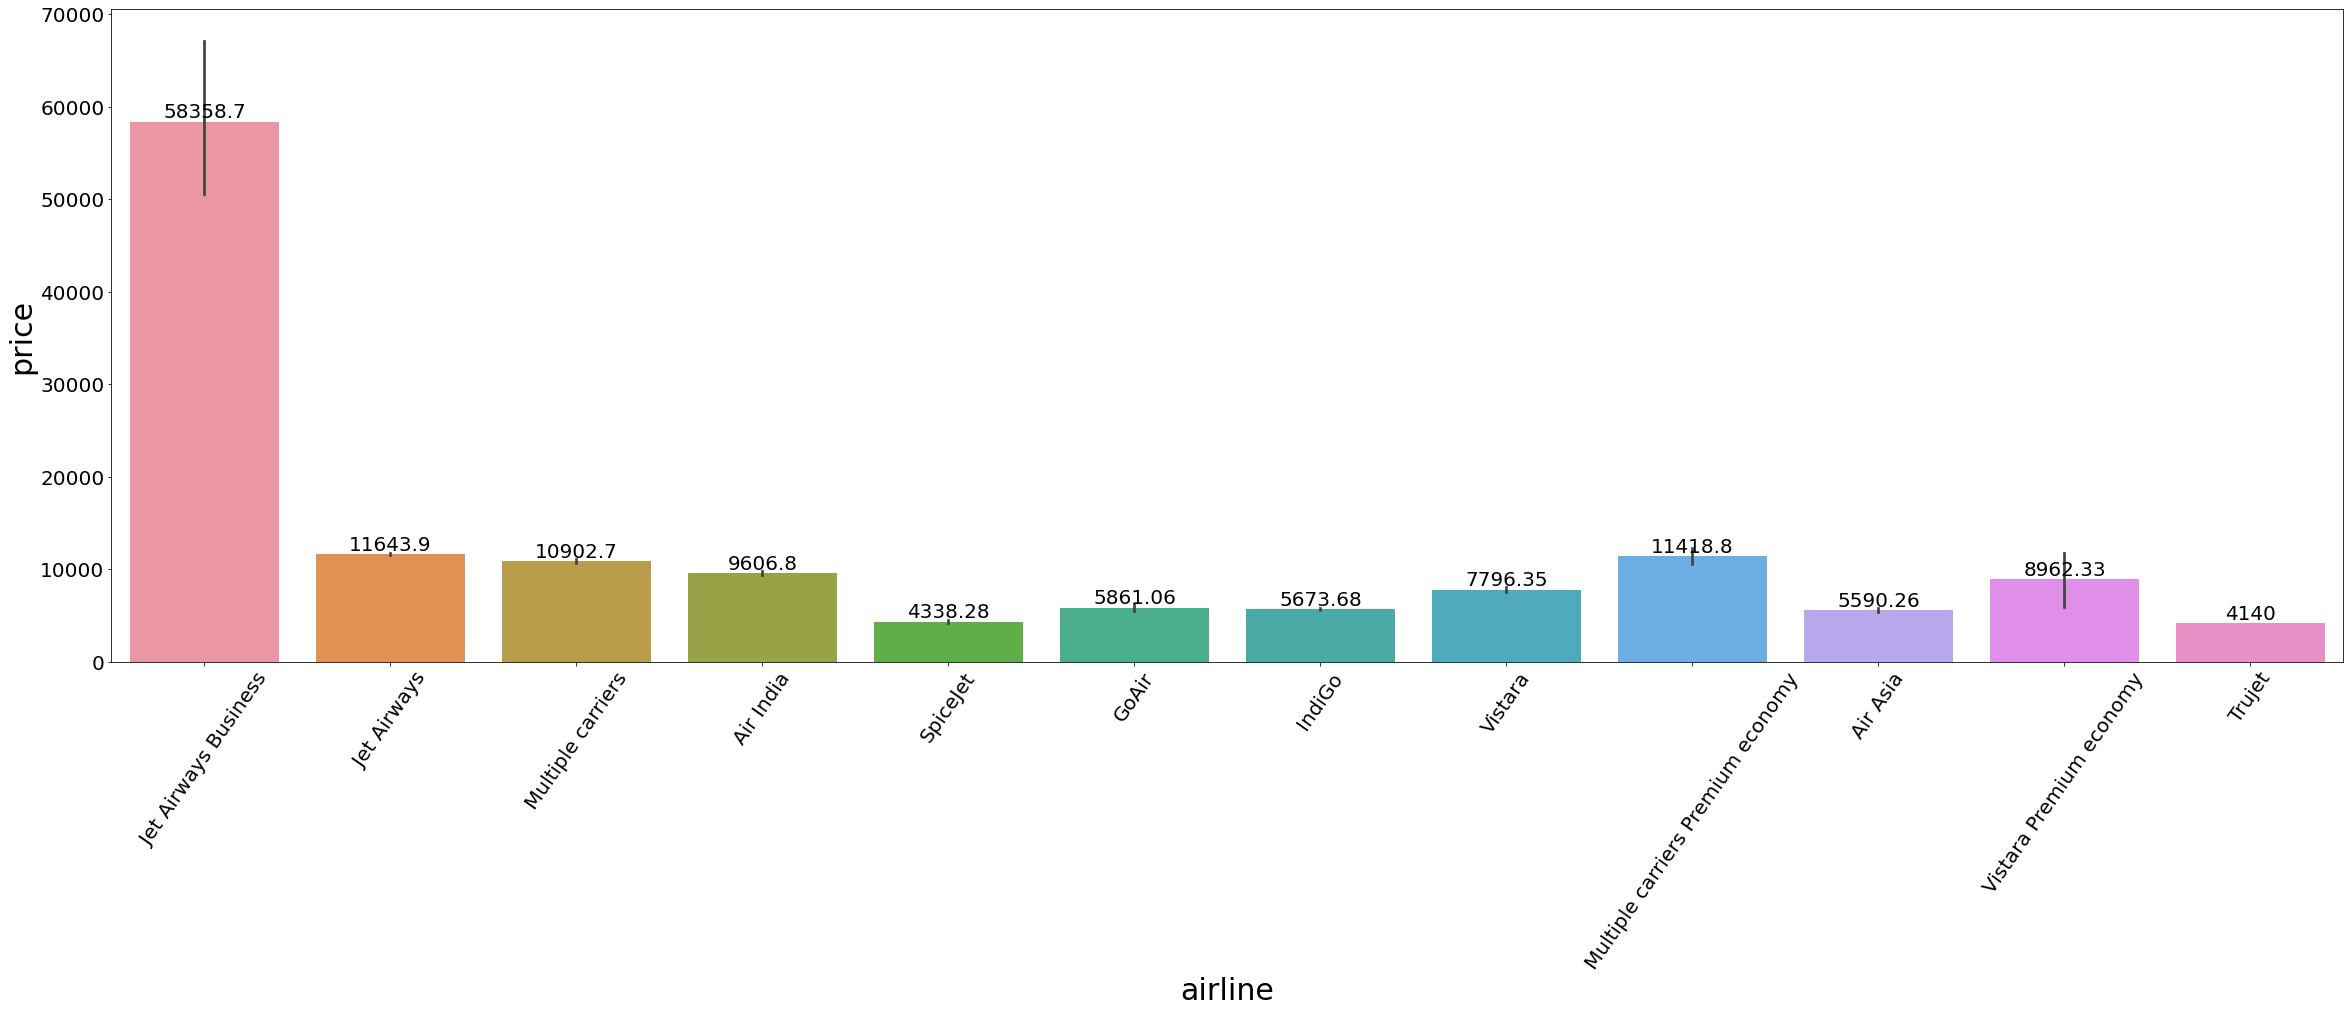

In [113]:
plt.figure(figsize = (40, 12))
ax = sns.barplot(x = 'airline', y ='price', data=analysis_df.sort_values("price", ascending = False))
ax = ax.bar_label(ax.containers[0],fontsize=20)
plt.xlabel('airline',fontsize=30)
expensive_airline = plt.xticks(rotation=55,fontsize=20)
expensive_airline = plt.ylabel('price',fontsize=30)
expensive_airline = plt.yticks(fontsize=20)

### Observation:
 - Jet Airways Business has higher flight fares as compared to other Airlines, followed by Jet Airways and Multiple carriers.

#### Q.4 Which airline has boarded the most ?

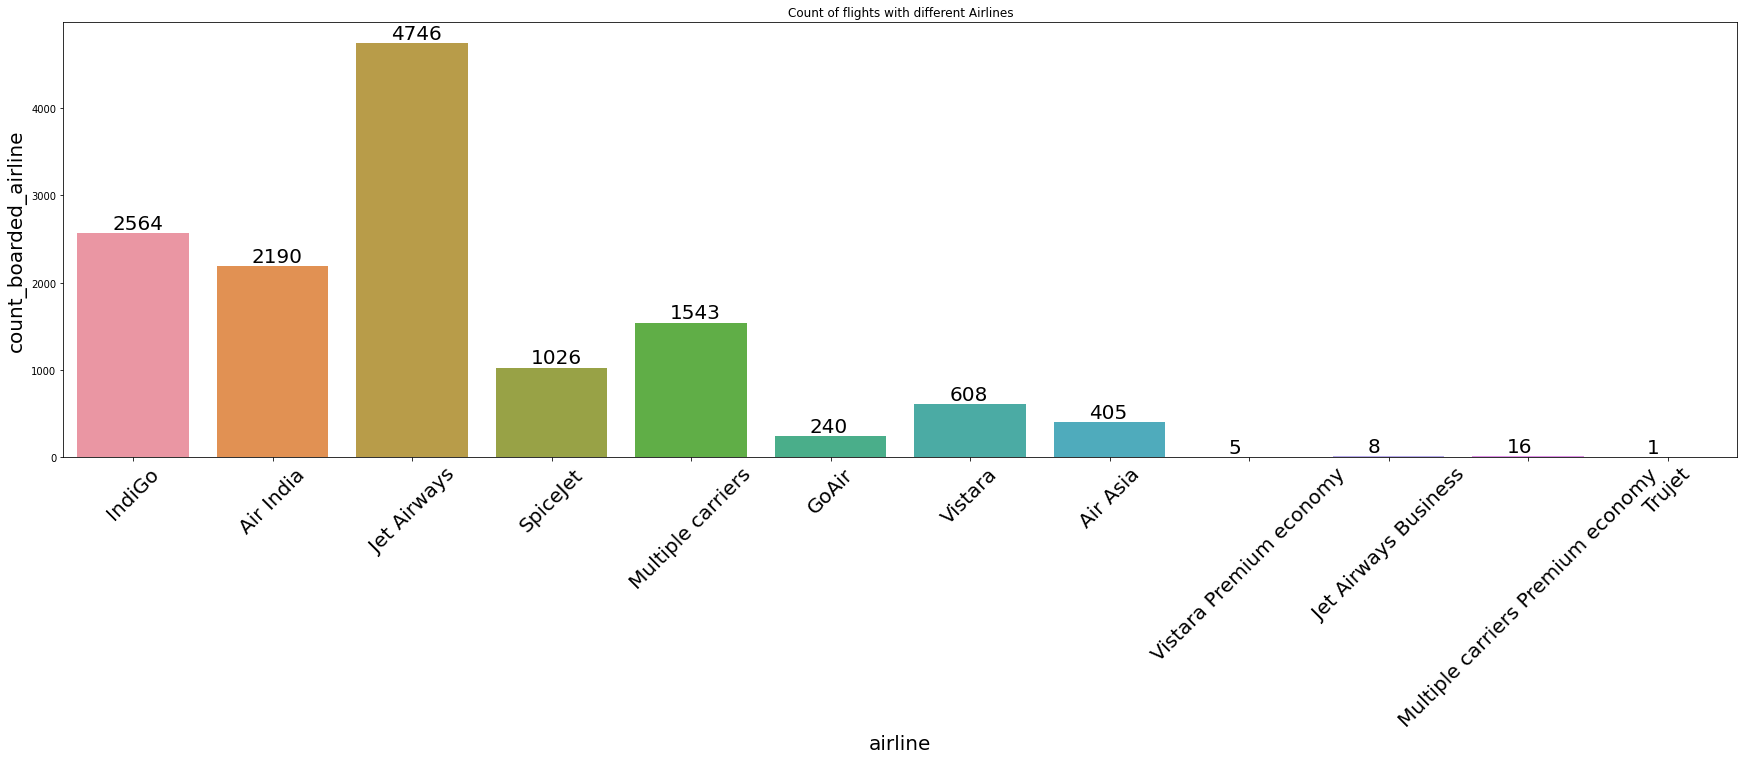

In [127]:
plt.figure(figsize = (30,8))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =final_df)
plt.xlabel('airline', fontsize=20)
plt.ylabel('count_boarded_airline', fontsize=20)
plt.xticks(rotation = 45,fontsize=20)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black',fontsize=20)

### Observation
- Jet Airways has most of the flights boarded followed by IndiGo and AirIndia.

#### Q.5 Which source will be having highest fare?

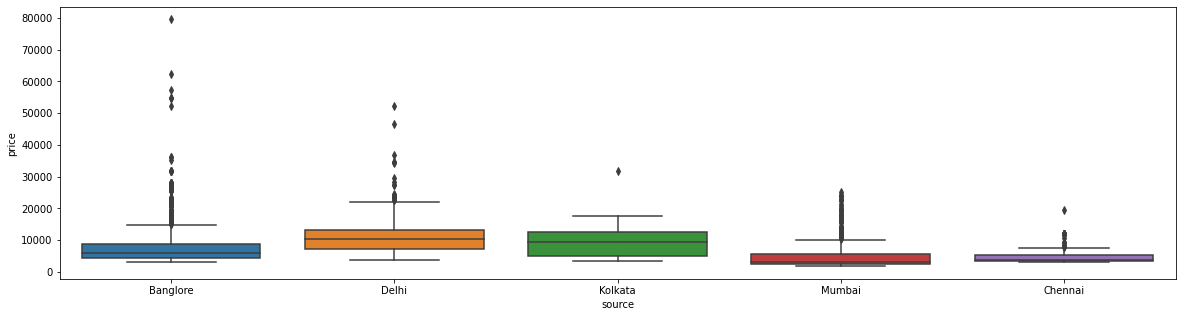

In [29]:
plt.figure(figsize = (20,5))
sns.boxplot(y = "price", x = "source", data = final_df.sort_values("price", ascending = False))
plt.show()

### Observation
 - Flights originating from banglore has high flight fares as compared to other sources ~from where flights are originating.~
 - Banglore as the source location has the most outliers as it's maximum price is approximately 80,000 rupees while Chennai has the least as it's maximum price is approximately 25,000 rupees
 

### Q.6 Which destination will be having highest fare?

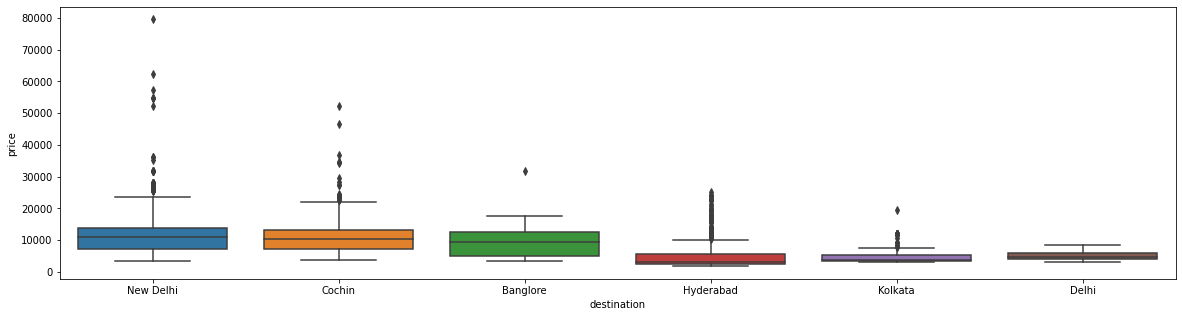

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(y = "price", x = "destination", data = final_df.sort_values("price", ascending = False))
plt.show()

### Observation:
 - Flights whose destination is New Delhi has highest fare compared to other flights whose destination is other than New Delhi.
 - New Delhi as the destination location has most of the outliers while Kolkata has the least.

### Conclusion - Results:

#### Q.1.Top 10 Aviation Companies whose flight tickets are sold the most ?

- Of the total flight tickets sold Jet Airways has the highest share followed by Indigo.

#### Q.2. Which month have most number of flights?

- May has most number of flights followed by June and March.

#### Q.3. Which airline is most expensive?

- Jet Airways Business has higher flight fares as compared to other Airlines, followed by Jet Airways and Multiple carriers.
- Jet Airways has the most outliers in terms of price.

#### Q.4 Which airline has boarded the most ?

- Jet Airways has most of the flights boarded followed by IndiGo and AirIndia.

#### Q.5 Which source will be having highest fare?

 - Flights originating from banglore has high flight fares as compared to other sources from where flights are originating.
 - Banglore as the source location has the most outliers while Chennai has the least.

#### Q.6 Which destination will be having highest fare?

 - Flights whose destination is New Delhi has highest fare compared to other flights whose destination is other than New Delhi.
 - New Delhi as the destination location has most of the outliers while Kolkata has the least.